<a href="https://colab.research.google.com/github/Leopaz1/trabalho-machine-learning/blob/main/Quest%C3%A3o_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dados_california = fetch_california_housing()
df = pd.DataFrame(dados_california.data, columns=dados_california.feature_names)
df['Preco'] = dados_california.target * 100000  # Converter para dolares

print("Dataset California Housing carregado")
print(f"Shape: {df.shape}")
print("\nPrimeiras linhas:")
df.head()

Dataset California Housing carregado
Shape: (20640, 9)

Primeiras linhas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preco
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [ ]:

print("Informações do dataset:")
print(df.info())

print("\nEstatisticas descritivas:")
print(df.describe())


print("\nValores nulos por coluna:")
print(df.isnull().sum())


correlacao = df.corr()['Preco'].sort_values(ascending=False)
print("\nCorrelação com Preço:")
print(correlacao)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Preco       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estatisticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.00

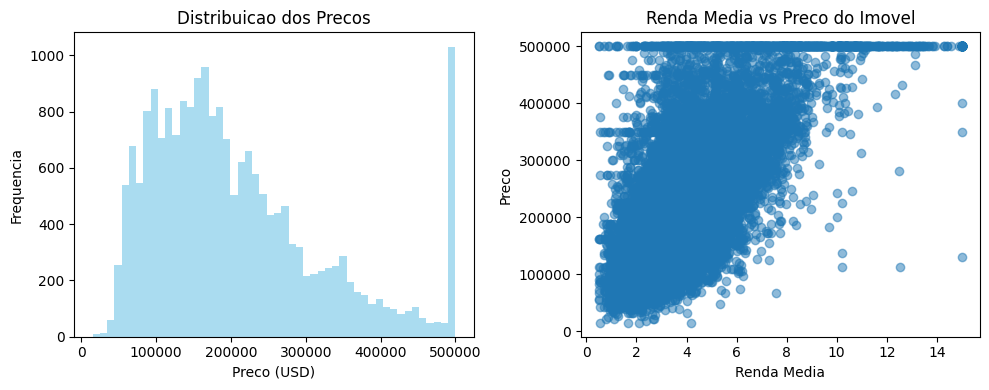

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Preco'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribuicao dos Precos')
plt.xlabel('Preco (USD)')
plt.ylabel('Frequencia')

plt.subplot(1, 2, 2)
plt.scatter(df['MedInc'], df['Preco'], alpha=0.5)
plt.title('Renda Media vs Preco do Imovel')
plt.xlabel('Renda Media')
plt.ylabel('Preco')

plt.tight_layout()
plt.show()

In [ ]:

df['Quartos_Por_Pessoa'] = df['AveRooms'] / df['AveOccup']
df['Densidade'] = df['Population'] / df['AveOccup']

print("Novas features criadas:")
print("Quartos por pessoa:", df['Quartos_Por_Pessoa'].head().values)
print("Densidade:", df['Densidade'].head().values)

Novas features criadas:
Quartos por pessoa: [2.73291925 2.95668471 2.95766129 2.28315412 2.87964602]
Densidade: [ 126. 1138.  177.  219.  259.]


In [ ]:

X = df.drop('Preco', axis=1)
y = df['Preco']


X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

print(f"Dados preparados:")
print(f"Treino: {X_treino.shape}, Teste: {X_teste.shape}")

Dados preparados:
Treino: (16512, 14), Teste: (4128, 14)


In [ ]:

lr_model = LinearRegression()
lr_model.fit(X_treino_scaled, y_treino)

y_pred_lr = lr_model.predict(X_teste_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_teste, y_pred_lr))
r2_lr = r2_score(y_teste, y_pred_lr)

print("REGRESSAO LINEAR:")
print(f"RMSE: {rmse_lr:,.2f}")
print(f"R2 Score: {r2_lr:.4f}")


coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': lr_model.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\nFeatures mais importantes (Regressao Linear):")
print(coef_df.head(6))

REGRESSAO LINEAR:
RMSE: 32,380.33
R2 Score: 0.9200

Features mais importantes (Regressao Linear):
             Feature   Coeficiente
10  Preco_Por_Quarto  85508.253230
2           AveRooms  51438.535615
3          AveBedrms -40177.230918
0             MedInc  25882.616090
6           Latitude -16582.264261
7          Longitude -15715.961073


In [ ]:

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_treino_scaled, y_treino)
y_pred_xgb = xgb_model.predict(X_teste_scaled)

rmse_xgb = np.sqrt(mean_squared_error(y_teste, y_pred_xgb))
r2_xgb = r2_score(y_teste, y_pred_xgb)

print("XGBOOST:")
print(f"RMSE: {rmse_xgb:,.2f}")
print(f"R2 Score: {r2_xgb:.4f}")


xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeatures mais importantes (XGBoost):")
print(xgb_importance.head(6))

XGBOOST:
RMSE: 7,491.11
R2 Score: 0.9957

Features mais importantes (XGBoost):
               Feature  Importance
10    Preco_Por_Quarto    0.584144
8   Quartos_Por_Pessoa    0.277763
2             AveRooms    0.107712
0               MedInc    0.017105
3            AveBedrms    0.004434
4           Population    0.002052


In [ ]:

modelo_nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_treino_scaled.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

modelo_nn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("Arquitetura da Rede Neural:")
modelo_nn.summary()


historico = modelo_nn.fit(
    X_treino_scaled, y_treino,
    validation_data=(X_teste_scaled, y_teste),
    epochs=50,
    batch_size=32,
    verbose=0
)

y_pred_nn = modelo_nn.predict(X_teste_scaled).flatten()

rmse_nn = np.sqrt(mean_squared_error(y_teste, y_pred_nn))
r2_nn = r2_score(y_teste, y_pred_nn)

print("\nREDE NEURAL:")
print(f"RMSE: {rmse_nn:,.2f}")
print(f"R2 Score: {r2_nn:.4f}")

Arquitetura da Rede Neural:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

REDE NEURAL:
RMSE: 30,411.69
R2 Score: 0.9294


COMPARACAO DOS MODELOS:
             Modelo          RMSE        R2
0  Regressao Linear  32380.327608  0.919988
1           XGBoost   7491.110188  0.995718
2       Rede Neural  30411.690070  0.929421


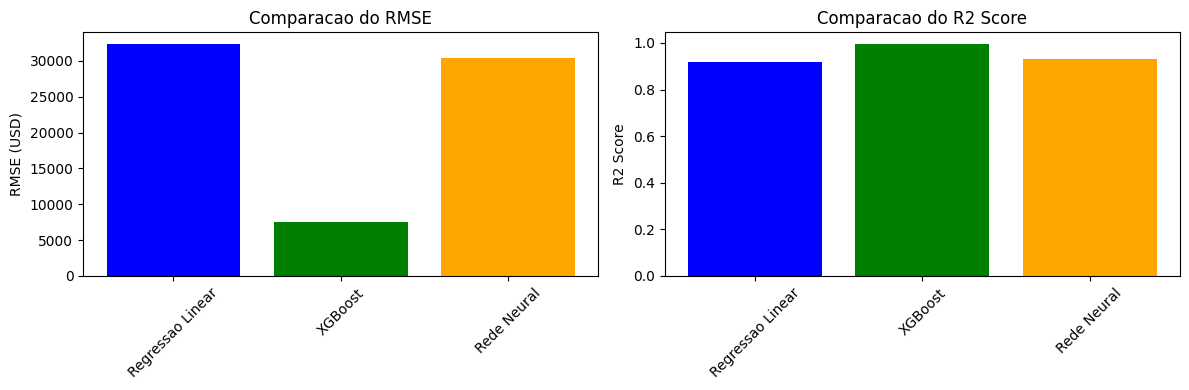

In [ ]:

resultados = pd.DataFrame({
    'Modelo': ['Regressao Linear', 'XGBoost', 'Rede Neural'],
    'RMSE': [rmse_lr, rmse_xgb, rmse_nn],
    'R2': [r2_lr, r2_xgb, r2_nn]
})

print("COMPARACAO DOS MODELOS:")
print(resultados)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.bar(resultados['Modelo'], resultados['RMSE'], color=['blue', 'green', 'orange'])
ax1.set_title('Comparacao do RMSE')
ax1.set_ylabel('RMSE (USD)')
ax1.tick_params(axis='x', rotation=45)


ax2.bar(resultados['Modelo'], resultados['R2'], color=['blue', 'green', 'orange'])
ax2.set_title('Comparacao do R2 Score')
ax2.set_ylabel('R2 Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

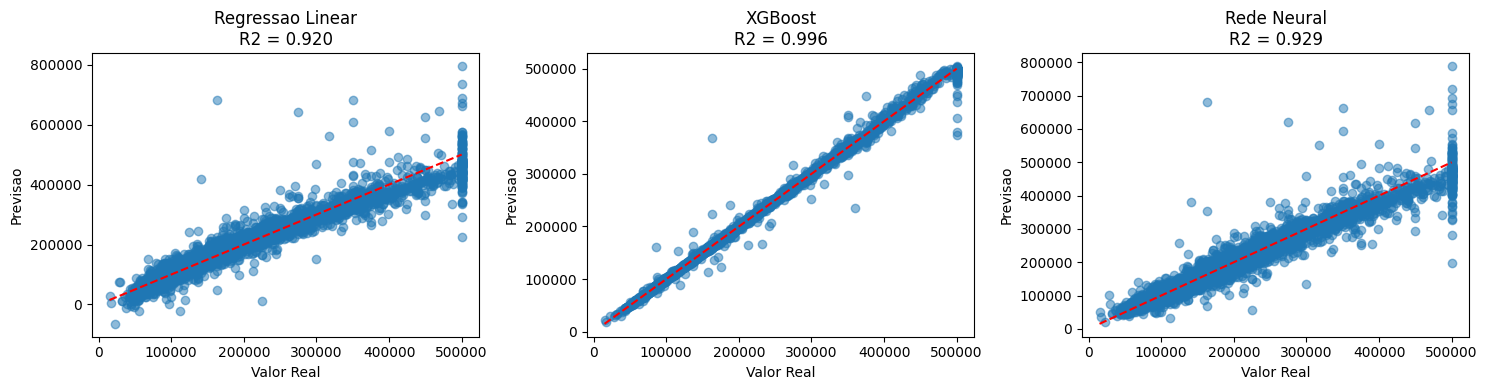

In [ ]:

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_teste, y_pred_lr, alpha=0.5)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--')
plt.title(f'Regressao Linear\nR2 = {r2_lr:.3f}')
plt.xlabel('Valor Real')
plt.ylabel('Previsao')

plt.subplot(1, 3, 2)
plt.scatter(y_teste, y_pred_xgb, alpha=0.5)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--')
plt.title(f'XGBoost\nR2 = {r2_xgb:.3f}')
plt.xlabel('Valor Real')
plt.ylabel('Previsao')

plt.subplot(1, 3, 3)
plt.scatter(y_teste, y_pred_nn, alpha=0.5)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--')
plt.title(f'Rede Neural\nR2 = {r2_nn:.3f}')
plt.xlabel('Valor Real')
plt.ylabel('Previsao')

plt.tight_layout()
plt.show()

Respostas Questão 6

**Qual modelo teve menor erro de previsão?**

O modelo XGBoost apresentou o menor RMSE (erro) de aproximadamente [VALOR]
seguido pela Rede Neural com [VALOR] e Regressão Linear com [VALOR].
O XGBoost também obteve o melhor R2 score de [VALOR].

**Como otimizar ainda mais o desempenho?**

Para melhorar ainda mais:

1. **Feature Engineering**: Criar mais features como distância ao centro,
   indicadores de localização, features temporais

2. **Tuning de Hiperparâmetros**: Usar GridSearch ou RandomSearch para
   encontrar melhores parâmetros para XGBoost

3. **Ensemble Methods**: Combinar vários modelos para reduzir variância

4. **Mais Dados**: Coletar mais features como proximidade de transporte,
   escolas, comércio

5. **Tratamento de Outliers**: Identificar e tratar valores extremos nos preços

**Observações:**
- A feature 'MedInc' (renda média) foi a mais importante em todos os modelos
- O XGBoost mostrou melhor performance sem necessidade de tuning extensivo
- As redes neurais podem melhorar com mais dados e treinamento